## 1. Make classification data and get ready

In [38]:
import sklearn

In [39]:
from sklearn.datasets import make_circles

# make 1000 samples
n_samples = 1000

# Create make_circles
X,y = make_circles(n_samples, 
                   noise=0.03,
                   random_state=42)

In [40]:
len(X), len(y)

(1000, 1000)

In [41]:
print(f"First 5 samples of X:\n {X[:5]}")
print(f"First 5 samples of y:\n {y[:5]}")

First 5 samples of X:
 [[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]
First 5 samples of y:
 [1 1 1 1 0]


In [42]:
y

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,

In [43]:
# Make DataFrame of circle data
import pandas as pd
circles = pd.DataFrame({"X1": X[:,0], 
                        "X2": X[:,1],
                        "label": y})
circles.head(10)

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


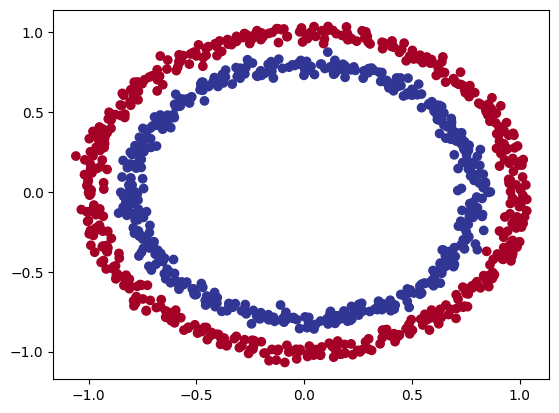

In [44]:
# Visualize visualize visualize
import matplotlib.pyplot as plt
plt.scatter(x=X[:,0],
            y=X[:,1],
            c=y,
            cmap=plt.cm.RdYlBu)

### 1.1 Check input and output shapes

In [9]:
X.shape, y.shape

((1000, 2), (1000,))

In [46]:
# View the first example of features and labels
X_sample = X[0]
y_sample = y[0]

print(f"Values for 1 sample of X: {X_sample} and the same for y: {y_sample}")
print(f"Shapes for 1 sample of X: {X_sample.shape} and the same for y: {y_sample.shape}")

Values for 1 sample of X: [0.75424625 0.23148074] and the same for y: 1
Shapes for 1 sample of X: (2,) and the same for y: ()


### 1.2 Turn data into tensors and create traina nd test splits

In [11]:
# Turn data into tensors
import torch
torch.__version__

'2.1.1'

In [12]:
type(X)

numpy.ndarray

In [47]:
# Turn data into tensors
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

X[:5], y[:5]

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]),
 tensor([1., 1., 1., 1., 0.]))

In [48]:
type(X), X.dtype, y.dtype

(torch.Tensor, torch.float32, torch.float32)

In [50]:
# Split data into training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2, # 0.2 is usually used for testing
                                                    random_state=42) #equivalent to setting a random seed. We use since torch.manual_seed only works on torch code.

In [16]:
len(X_train), len(X_test), len(y_train), len(y_test)

(800, 200, 800, 200)

In [17]:
n_samples

1000

### 2. Building a model

Let's build a model to classify the blue and red dots.

To do so, we want to:
1. Setup device agnostic code so our code will run on an accelerator (GPU) if there is one 
2. Construct a model (by subclassing `nn.Module`)
3. Define a loss function and optimizer
4. Create a training and test loop

In [18]:
# Import PyTorch and nn
import torch
from torch import nn
from functions import get_device

# Make device agnostic code
device = get_device()
device

'mps'

In [19]:
X_train

tensor([[ 0.6579, -0.4651],
        [ 0.6319, -0.7347],
        [-1.0086, -0.1240],
        ...,
        [ 0.0157, -1.0300],
        [ 1.0110,  0.1680],
        [ 0.5578, -0.5709]])

Now we've set up device agnostic code, let's create a model that: 

1. Subclasses `nn.Module` (almost all models in PyTorch subclass `nn.Module`)
2. Create 2 `nn.Linear()` layers that are capable of handling the shape of our data
3. Defines a `forward()` method that outlines the forward pass (or forward computations) of the model
4. Instantiate an instance of our model class and send it to the target `device`

In [ ]:
# 1. Construct a model that subclasses nn.Module
class CircleModelV0(nn.Module):
    def __init__(self):
        super().__init__()
        # 2. Create 2 nn.Linear layers capable of handling the shapes of our data
        self.layer_1 = nn.Linear(in_features=2, out_features=5)
        self.layer_2 = nn.Linear(in_features=5, out_features=1)

        # 2. Alternative way to define layers
        # self.two_linear_layers = nn.Sequential(
        # nn.Linear(in_features=2, out_features=5),
        # nn.Linear(in_features=5, out_features=1)
        # )

    # 3. Define a forward() method that outlines the forward pass
    def forward(self, x):
        # return self.layer_2(self.layer_1(x)) # x -> layer_1 -> layer_2 -> output
        return self.two_linear_layers(x)

# 4. Instantiate an instance of our model class and send it to the target device
model_0 = CircleModelV0().to(device)
model_0

In [22]:
next(model_0.parameters()).device

device(type='mps', index=0)

There is a simpler way of doing this by using `nn.Sequential` but this does not generalize as well.
`nn.Sequential` is a subclass of `nn.Module`

In [71]:
# Let's replicate the model above using nn.Sequential()
model_0 = nn.Sequential(
    nn.Linear(in_features=2, out_features=5),
    nn.Linear(in_features=5, out_features=1)
).to(device)

model_0

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [72]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[ 0.5406,  0.5869],
                      [-0.1657,  0.6496],
                      [-0.1549,  0.1427],
                      [-0.3443,  0.4153],
                      [ 0.6233, -0.5188]], device='mps:0')),
             ('0.bias',
              tensor([0.6146, 0.1323, 0.5224, 0.0958, 0.3410], device='mps:0')),
             ('1.weight',
              tensor([[-0.0631,  0.3448,  0.0661, -0.2088,  0.1140]], device='mps:0')),
             ('1.bias', tensor([-0.2060], device='mps:0'))])

In [73]:
# Make predictions
with torch.inference_mode():
    untrained_preds = model_0(X_test.to(device))
print(f"Length of predictions: {len(untrained_preds)}, Shape: {untrained_preds.shape}")
print(f"length of test samples: {len(X_test)}, Shape: {X_test.shape}")
print(f"\nFirst 10 predictions:\n{untrained_preds[:10]}")
print(f"\nFirst 10 labels:\n{y_test[:10]}")

Length of predictions: 200, Shape: torch.Size([200, 1])
length of test samples: 200, Shape: torch.Size([200, 2])

First 10 predictions:
tensor([[-0.1269],
        [-0.0967],
        [-0.1908],
        [-0.1089],
        [-0.1667],
        [-0.1484],
        [-0.0826],
        [-0.0946],
        [-0.1918],
        [-0.0944]], device='mps:0')

First 10 labels:
tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.], device='mps:0')


In [74]:
X_test[:10], y_test[:10]

(tensor([[-0.3752,  0.6827],
         [ 0.0154,  0.9600],
         [-0.7028, -0.3147],
         [-0.2853,  0.9664],
         [ 0.4024, -0.7438],
         [ 0.6323, -0.5711],
         [ 0.8561,  0.5499],
         [ 1.0034,  0.1903],
         [-0.7489, -0.2951],
         [ 0.0538,  0.9739]], device='mps:0'),
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.], device='mps:0'))

#### 2.1 Setup loss function and optimizer

Which loss function or optimizer should you use?

Again... this is problem specific.

For examples for regression you might wnat MAE or MSE

For classification you might want binary cross entropy or categorical cross entropy (cross entropy)

As a reminder, the loss function measures how *wrong* your model predictions are.

And for optimizers, two of the most common and useful are SGD and Adam, however PyTorch has many built in options

* For the loss function we're going to use `torch.nn.BeCWithLogitsLoss()`
* For different optimizers see `torch.optim`
* For common choices of both see: https://www.learnpytorch.io/02_pytorch_classification/#21-setup-loss-function-and-optimizer

In [75]:
# Setup the loss function
# loss_fn = nn.BCELoss() # BCELoss = requires inputs to have gone through the sigmoid activation function prior to input to BCELoss
# nn.Sequential(
#     nn.Sigmoid(),
#     nn.BCELoss()
# )

loss_fn = nn.BCEWithLogitsLoss() # BCEWithLogitsLoss = sigmoid activation function
                                 # This is numerically more stable than using plain sigmoid followed by BCEloss as both are combined into one layer
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.1)

In [76]:
# Calculate accuracy - out of 100 examples, what percentage does our model get right?
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item() # item returns a torch number as a standard python number
    acc = (correct/len(y_pred)) * 100
    return acc

### 3. Training a model

To train our model, we're going to need to build a training loop

1. Forward pass
2. Calculate the loss
3. Optimizer zero grad (reset gradient)
4. Loss backward (backpropagation)
5. Optimizer step (gradient descent)

#### 3.1 Going from raw logits -> prediction probabilities -> preidction labels

Our model outputs are going to be raw **logits**.

We can convert these **logits** into prediction probabilities by passing them to some kind of activation function (e.g. sigmoid for binary classification and softmax for multiclass classification)

Then we can convert our model's prediction probabilities to **prediction labels** by either rounding them (for binary) or taking the `argmax()` (for softmax).

In [77]:
# View the first 5 outputs of the forward pass on the test data
model_0.eval() # DO
with torch.inference_mode(): # DO; Both these steps are needed when running the model for predictions/evaluation
    y_logits = model_0(X_test.to(device))[:5]
y_logits

tensor([[-0.1269],
        [-0.0967],
        [-0.1908],
        [-0.1089],
        [-0.1667]], device='mps:0')

In [78]:
y_test[:5]

tensor([1., 0., 1., 0., 1.], device='mps:0')

In [79]:
# Use the sigmoid activation functionon our model logits to turn them into prediction probabilities
y_pred_probs = torch.sigmoid(y_logits)
y_pred_probs

tensor([[0.4683],
        [0.4758],
        [0.4524],
        [0.4728],
        [0.4584]], device='mps:0')

For our prediction probability values, we need to perform a range-style rounding on them:
* `y_pred_probs` >= 0.5, `y=1` (class 1)
* `y_pred_probs` < 0.5, `y=0` (class 0)

In [80]:
# Find the predicted labels
y_preds = torch.round(y_pred_probs)

# In full (logits -> pred probs -> pred labels)
y_pred_labels = torch.round(torch.sigmoid(model_0(X_test.to(device))[:5]))

# Check for equality
print(torch.eq(y_preds.squeeze(), y_pred_labels.squeeze()))

# Get rid of extra dimension
y_preds.squeeze()

tensor([True, True, True, True, True], device='mps:0')


tensor([0., 0., 0., 0., 0.], device='mps:0')

In [81]:
y_test[:5]

tensor([1., 0., 1., 0., 1.], device='mps:0')

### 3.2 Building a training and testing loop

In [83]:
torch.manual_seed(42)

# set the number of epochs
epochs = 100

# Put data to target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

# Build training and evaluation loop
for epoch in range(epochs):
    ### Training
    model_0.train()

    # 1. Forward pass
    y_logits = model_0(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits)) # turn logits -> pred probs -> pred labels

    # 2. Calculate loss/accuracy
    # loss = loss_fn(torch.sigmoid(y_logits), # nn.BCEWithLogitsLoss expects logits 
    #               y_train)
    loss = loss_fn(y_logits,  # nn.BCEWithLogitsLoss expects logits
                   y_train)
    acc = accuracy_fn(y_true=y_train,
                      y_pred=y_pred)   

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backward
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    #### Testing
    model_0.eval()
    with torch.inference_mode():
        # 1. Forward pass
        test_logits = model_0(X_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))

        # 2. Calculate test loss/accuracy
        test_loss = loss_fn(test_logits,
                            y_test)
        test_acc = accuracy_fn(y_true=y_test, #switch up argument order to be consistent with scikit-learn (pytorch has weird order)
                               y_pred=test_pred)
        
        # Print out what's happening
        if epoch % 10 == 0:
            print(f"Epoch: {epoch} | Loss: {loss:.5f} | Acc: {acc:.2f}% | Test loss: {test_loss:.5f} | Test acc: {test_acc:.2f}%")


Epoch: 0 | Loss: 0.69302 | Acc: 50.50% | Test loss: 0.69542 | Test acc: 46.50%
Epoch: 10 | Loss: 0.69302 | Acc: 50.62% | Test loss: 0.69537 | Test acc: 46.00%
Epoch: 20 | Loss: 0.69301 | Acc: 50.62% | Test loss: 0.69532 | Test acc: 45.50%
Epoch: 30 | Loss: 0.69301 | Acc: 50.88% | Test loss: 0.69527 | Test acc: 45.50%
Epoch: 40 | Loss: 0.69300 | Acc: 50.88% | Test loss: 0.69523 | Test acc: 45.50%
Epoch: 50 | Loss: 0.69300 | Acc: 50.75% | Test loss: 0.69519 | Test acc: 45.50%
Epoch: 60 | Loss: 0.69300 | Acc: 51.00% | Test loss: 0.69515 | Test acc: 46.00%
Epoch: 70 | Loss: 0.69300 | Acc: 51.00% | Test loss: 0.69512 | Test acc: 46.00%
Epoch: 80 | Loss: 0.69299 | Acc: 50.88% | Test loss: 0.69509 | Test acc: 46.50%
Epoch: 90 | Loss: 0.69299 | Acc: 51.25% | Test loss: 0.69506 | Test acc: 47.00%


### 4. Make predictions and evaluate the model

From the metrics it looks like our model isn't learning anything...

So to inspect it let's make some predictions and make them visual!

In other words; "Visualize, visualize, visualize!"

To do so, we're going to import a function called `plot_decision_boundary()` https://github.com/mrdbourke/pytorch-deep-learning/blob/main/helper_functions.py 

In [86]:
import requests
from pathlib import Path

# Download helper functions from Learn Pytorch repo (if it's not alrady downloaded)
if Path("helper_function.py").is_file():
    print("helper_functions.py already exists, skip download")
else:
    print("Downloading helper_functions.py")
    request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
    with open("helper_functions.py", "wb") as f:
        f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary

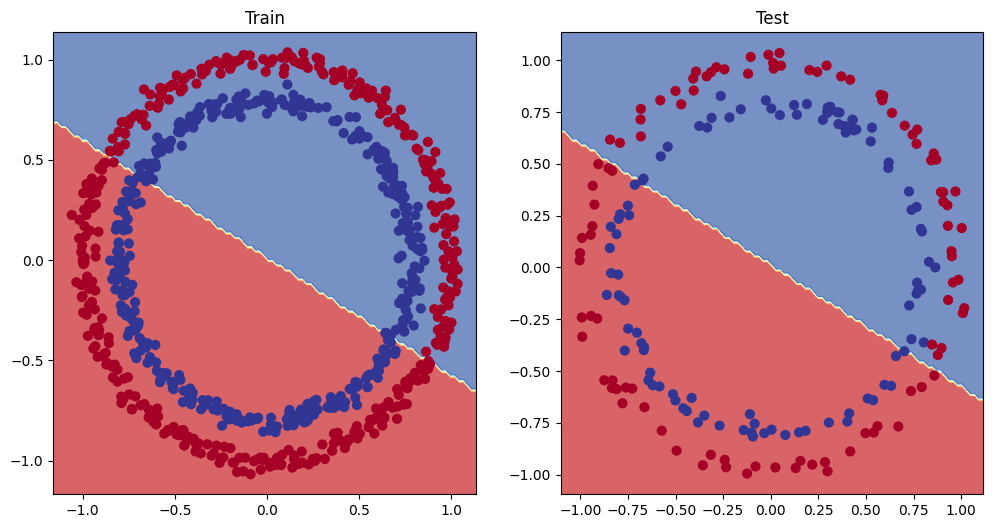

In [87]:
# plot decision boundary of the model
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model=model_0,
                       X=X_train,
                       y=y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_0, X_test, y_test)

### 5. Improving a model (from a model perspective)
* Adding more layers - give the model more chances o learn about patterns in the data
* Add more hidden units - go from 5 hidden units to 10 hidden units
* Fit for longer
* Changing the activation functions
* Changing the learning rate
* Change the loss function

These options are all from a model's perspective (not data perspective) because they deal directly with the model, rather than the data.

And because these options are all values we (a ml engineers and data scientists) can change, they are **hyperparameters**

Let's try and improve model by:
* Adding more hidden units: 5->10
* Increase number of layers:2->3
* Increase the number of epochs: 100->100

In [88]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[ 0.5425,  0.5880],
                      [-0.1825,  0.6401],
                      [-0.1600,  0.1398],
                      [-0.3347,  0.4206],
                      [ 0.6171, -0.5223]])),
             ('0.bias', tensor([0.6107, 0.1631, 0.5303, 0.0778, 0.3520])),
             ('1.weight',
              tensor([[-0.0510,  0.3487,  0.1161, -0.1961,  0.1287]])),
             ('1.bias', tensor([-0.1180]))])

In [94]:
# Create a larger model (subclass nn.Module method; not nn.Sequential method which is another way to sublcass nn.Module)
class CircleModelV1(nn.Module):
    def __init__(self):
        super().__init__()
        # Create 3 nn.Linear layers
        self.layer_1 = nn.Linear(in_features=2, out_features=10)
        self.layer_2 = nn.Linear(in_features=10, out_features=10)
        self.layer_3 = nn.Linear(in_features=10, out_features=1)

    # 3. Define a forward() method that outlines the forward pass
    def forward(self, x):
        # z = self.layer_1(x)
        # z = self.layer_2(z)
        # z = self.layer_3(z)
        return self.layer_3(self.layer_2(self.layer_1(x))) 
    
# 4. Instantiate an instance of our model class and send it to the target device
model_1 = CircleModelV1().to(device)
model_1

CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [96]:
# Setup a loss function and optimizer
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(params=model_1.parameters(),
                             lr=0.1)

# Set the manual seed
torch.manual_seed(42)

# Training code
epochs = 1000

# put data to target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

# Build training and evaluation loop
for epoch in range(epochs):
    ### Training
    model_1.train()
    
    # forward pass
    y_logits = model_1(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits))

    # Calculate loss
    loss = loss_fn(y_logits, y_train)
    acc = accuracy_fn(y_true=y_train, y_pred=y_pred)

    # zero grad
    optimizer.zero_grad()

    # back prop
    loss.backward()

    # optimizer step
    optimizer.step()

    ### Testing
    model_1.eval()
    with torch.inference_mode():
        # forward pass
        test_logits = model_1(X_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))

        # Calculate test loss
        test_loss = loss_fn(test_logits, y_test)
        test_acc = accuracy_fn(y_true=y_test, y_pred=test_pred)
        
        # Print out what's happening
        if epoch % 100 == 0:
            print(f"Epoch: {epoch} | Loss: {loss:.5f} | Acc: {acc:.2f}% | Test loss: {test_loss:.5f} | Test acc: {test_acc:.2f}%")

Epoch: 0 | Loss: 0.69396 | Acc: 50.88% | Test loss: 0.79303 | Test acc: 50.00%
Epoch: 100 | Loss: 0.69298 | Acc: 51.50% | Test loss: 0.69470 | Test acc: 45.50%
Epoch: 200 | Loss: 0.69317 | Acc: 48.62% | Test loss: 0.69505 | Test acc: 47.00%
Epoch: 300 | Loss: 0.69298 | Acc: 51.12% | Test loss: 0.69468 | Test acc: 46.00%
Epoch: 400 | Loss: 0.69298 | Acc: 51.00% | Test loss: 0.69468 | Test acc: 46.00%
Epoch: 500 | Loss: 0.69298 | Acc: 51.00% | Test loss: 0.69468 | Test acc: 46.00%
Epoch: 600 | Loss: 0.69298 | Acc: 51.00% | Test loss: 0.69468 | Test acc: 46.00%
Epoch: 700 | Loss: 0.69298 | Acc: 51.00% | Test loss: 0.69468 | Test acc: 46.00%
Epoch: 800 | Loss: 0.69298 | Acc: 51.00% | Test loss: 0.69468 | Test acc: 46.00%
Epoch: 900 | Loss: 0.69298 | Acc: 51.00% | Test loss: 0.69468 | Test acc: 46.00%


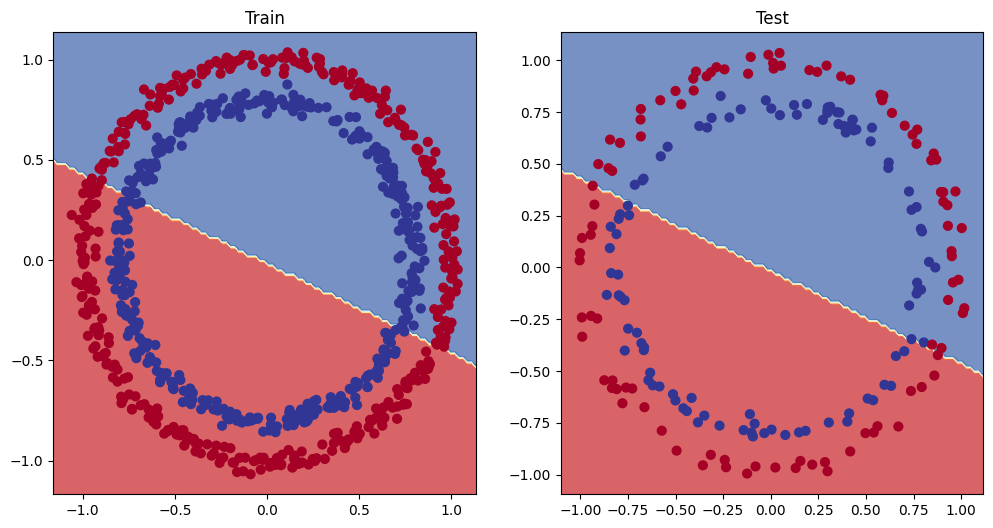

In [97]:
# plot decision boundary of the model
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model=model_1,
                       X=X_train,
                       y=y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_1, X_test, y_test)